<a href="https://colab.research.google.com/github/wiwi1510/Data-analysis/blob/main/Times_World_University_Rankings_(2011_2016)_Team_2_LyVinhNghi_LeCanhSang_Mai_Gia_Han_Python_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **I. About Data**

**The dataset was obtained by scraping the Times World University Rankings website with Python**
*Feature Description*
The dataset has a total of 14 columns.

1. World_Rank:              rank given to the university
2. University_Name:         name of the university
3. Country:                 country in which the university is located
4. Teaching_Rating:         the learning environment
5. Inter_Outlook_Rating: proportion of international students and staffs
6. Research_Rating: quality of research at the university
7. Citations_Rating: research influence
8. Industry_Income_Rating: knowledge transfer
9. Total_Score: score of the university based on the five key metrics mentioned above  
10. Num_Students: total number of students
11. Student/Staff_Ratio: staff to student ratio
12. %_Inter_Students: number of international students enrolled at the university
13. %_Female_Students: number of female students enrolled at the university
14. Year: year of ranking


## ***I.1.How to calculate total score of university with 5 metrics***

1. Teaching (the learning environment): 30%  (teaching_rating)
   
   
    -Reputation survey: 15%                             
    -Staff-to-student ratio: 4.5%                           
    -Doctorate-to-bachelor’s ratio: 2.25%                 
    -Doctorates-awarded-to-academic-staff ratio: 6%         
    -Institutional income: 2.25%                          
    
2. International outlook (staff, students, research): 7.5% (inter_outlook_rating)

    
    -Proportion of international students: 2.5%
    -Proportion of international staff: 2.5% 
    -International collaboration: 2.5% 
    
3. Research (volume, income and reputation): 30%  (research_rating)


    -Reputation survey: 18%              
    -Research income: 6%              
    -Research productivity: 6%   
    
4. Citations (research influence): 30% (citations_rating)

5. Industry income (knowledge transfer): 2.5%  (industry_income_rating)


## ***I.2.Import Libraries and the original data type***

### Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [90]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
FILE_URL = '/content/drive/MyDrive/DATA/colab my/Times World University Rankings (2011-2016).xlsx'
FILE_URL_SUB = '/content/drive/MyDrive/DATA/colab my/region_country.xlsx'

### Main Data

In [92]:
uni = pd.read_excel(FILE_URL)
uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   World_Rank              2603 non-null   object 
 1   University_Name         2603 non-null   object 
 2   Country                 2603 non-null   object 
 3   Teaching_Rating         2603 non-null   float64
 4   Inter_Outlook_Rating    2603 non-null   object 
 5   Research_Rating         2603 non-null   float64
 6   Citations_Rating        2603 non-null   float64
 7   Industry_Income_Rating  2603 non-null   object 
 8   Total_Score             2603 non-null   object 
 9   Num_Students            2544 non-null   float64
 10  Student/Staff_Ratio     2544 non-null   float64
 11  %_Inter_Students        2536 non-null   float64
 12  %_Female_Students       2370 non-null   object 
 13  Year                    2603 non-null   int64  
dtypes: float64(6), int64(1), object(7)
memor

We can see from the dataset info() method that there are many null values across multiple columns with NaN and hyphen mark. Also, the 5 metrics columns to calculate the Total score column are **object** type.

Let's take a look at the number of null values.

In [93]:
uni.head()

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Total_Score,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96,2243.0,6.9,27.0,33,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,7929.0,8.4,27.0,45,2011


In [94]:
uni.tail()

,World_Rank,University_Name,Country,Teaching_Rating,Inter_Outlook_Rating,Research_Rating,Citations_Rating,Industry_Income_Rating,Total_Score,Num_Students,Student/Staff_Ratio,%_Inter_Students,%_Female_Students,Year
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,-,21958.0,15.3,3.0,48,2016
2599,601-800,YÄ±ldÄ±z Technical University,Turkey,14.5,14.9,7.6,19.3,44,-,31268.0,28.7,2.0,36,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,-,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8.0,28,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,8663.0,20.6,4.0,43,2016


### Sub-Data
This data is just for supporting analyzing the main data in Visualization part.

In [95]:
region_dict = pd.read_excel(FILE_URL_SUB)
region_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Region   32 non-null     object
 1   Country  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


# **II. Data Cleaning and processing**

There are 2 things had to convert.

## ***II.1.Convert some columns/data to a correct data type***

### Main DataFrame

In [96]:
def clean_col(col):
    col = col.strip()
    col = col.replace("Student/Staff", "Student_Staff")
    col = col.lower()
    return col

new_columns = []
for c in uni.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)
uni.columns = new_columns

#replace '-' to null
uni = uni.replace('-','NaN')

# change columns type
uni['inter_outlook_rating'] = uni['inter_outlook_rating'].astype(float)
uni['industry_income_rating'] = uni['industry_income_rating'].astype(float)
uni['total_score'] = uni['total_score'].astype(float)
uni['%_female_students'] = uni['%_female_students'].astype(float)

uni.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching_rating         2603 non-null   float64
 4   inter_outlook_rating    2594 non-null   float64
 5   research_rating         2603 non-null   float64
 6   citations_rating        2603 non-null   float64
 7   industry_income_rating  2385 non-null   float64
 8   total_score             1201 non-null   float64
 9   num_students            2544 non-null   float64
 10  student_staff_ratio     2544 non-null   float64
 11  %_inter_students        2536 non-null   float64
 12  %_female_students       2367 non-null   float64
 13  year                    2603 non-null   int64  
dtypes: float64(10), int64(1), object(3)
memo

### Sub Data

In [97]:
def clean_col_sub(col):
    col = col.strip()
    col = col.lower()
    return col

new_columns_sub = []
for d in region_dict.columns:
    clean_d = clean_col_sub(d)
    new_columns_sub.append(clean_d)
region_dict.columns = new_columns_sub

region_dict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   region   32 non-null     object
 1   country  32 non-null     object
dtypes: object(2)
memory usage: 640.0+ bytes


## ***II.2.Convert NaN value in Total_Score column with a correct syntax***

As we can see in the original dataframe, there is a lot of null data in the total score column although there is still enough data in the calculated metrics.
So we will recalculate it for further analysis.


The Total Score is calculated by 5 metrics, which are teaching_rating,inter_outlook_rating, research_rating, citations_rating, industry_income_rating

**Note:**

- When there is a nan value in a certain column of row, don't caculated it.

- Only apply the syntax to a nan value in total score column and round it with 1 decimal

####The current data in 5 metrics columns

In [98]:
#@title Default title text
uni.loc[:,['teaching_rating','inter_outlook_rating', 'research_rating', 'citations_rating', 'industry_income_rating', 'total_score']]

,teaching_rating,inter_outlook_rating,research_rating,citations_rating,industry_income_rating,total_score
0,99.7,72.4,98.7,98.8,34.5,96.1
1,97.7,54.6,98.0,99.9,83.7,96.0
2,97.8,82.3,91.4,99.9,87.5,95.6
3,98.3,29.5,98.1,99.2,64.3,94.3
4,90.9,70.3,95.4,99.9,NaN,94.2
...,...,...,...,...,...,...
2598,18.6,24.3,10.9,26.5,35.4,NaN
2599,14.5,14.9,7.6,19.3,44.0,NaN
2600,24.0,16.1,10.2,36.4,37.9,NaN
2601,20.1,23.3,16.0,13.5,40.4,NaN


####Check how many null data in the calculated columns

There are 1402 null values in Total Score column, which is more than the other metrics columns

In [99]:
uni.isna().sum()

world_rank                   0
university_name              0
country                      0
teaching_rating              0
inter_outlook_rating         9
research_rating              0
citations_rating             0
industry_income_rating     218
total_score               1402
num_students                59
student_staff_ratio         59
%_inter_students            67
%_female_students          236
year                         0
dtype: int64

###Apply syntax

Extract 5 metrics columns and total score to make it a smaller dataframe for easier to apply the syntax

In [100]:
df = pd.DataFrame(uni, columns=['teaching_rating','inter_outlook_rating', 'research_rating', 'citations_rating', 'industry_income_rating', 'total_score'])
df.isna().sum()

teaching_rating              0
inter_outlook_rating         9
research_rating              0
citations_rating             0
industry_income_rating     218
total_score               1402
dtype: int64

In [101]:
#Write a syntax
nan_to_totalscore = []
for index, row in df.iterrows(): # return the result list of that row, iterrow(index: the number of rows, row:data of that row)
  if not np.isnan(row['total_score']): # Check value is not NaN
    nan_to_totalscore.append(row['total_score']) # Keep not NaN value
    continue
  # Calculate new value for NaN value
  new_value = (row['teaching_rating']*(float(30)/100))+(row['inter_outlook_rating']*(float(7.5)/100))+(row['citations_rating']*(float(30)/100))+(row['research_rating']*(float(30)/100))+(row['industry_income_rating']*(float(2.5)/100))
  nan_to_totalscore.append(new_value.round(1))
print(nan_to_totalscore)

[96.1, 96.0, 95.6, 94.3, 94.2, 91.2, 91.2, 91.1, 90.6, 89.5, 87.7, 86.9, 86.4, 83.9, 83.4, 83.4, 82.0, 81.0, 79.5, 79.3, 79.2, 78.4, 78.0, 76.5, 75.9, 75.6, 75.3, 75.1, 75.0, 73.8, 73.8, 73.2, 73.0, 72.9, 71.7, 71.0, 70.7, 69.9, 69.5, 69.2, 69.0, 68.6, 67.0, 67.0, 67.0, 67.0, 66.9, 66.5, 66.0, 66.0, 65.9, 65.6, 65.2, 65.0, 64.9, 64.7, 64.6, 64.2, 64.0, 63.9, 63.0, 63.0, 62.8, 62.7, 62.2, 62.1, 61.6, 61.4, 61.4, 61.4, 61.2, 61.1, 60.7, 60.7, 60.4, 60.3, 59.7, 59.6, 59.5, 59.5, 59.1, 59.1, 59.0, 59.0, 58.9, 58.3, 58.0, 57.9, 57.8, 57.7, 57.7, 57.7, 57.6, 57.5, 57.3, 57.3, 57.3, 57.2, 57.1, 57.0, 56.9, 56.6, 56.5, 56.4, 56.3, 56.2, 56.1, 56.1, 56.0, 56.0, 55.6, 55.4, 55.4, 55.3, 55.2, 55.2, 55.1, 55.0, 54.8, 54.6, 54.6, 54.5, 54.5, 54.4, 54.4, 54.4, 54.3, 54.2, 54.0, 53.4, 53.4, 53.3, 53.3, 53.3, 52.7, 52.6, 52.5, 52.4, 52.3, 52.2, 52.2, 52.1, 52.0, 51.9, 51.8, 51.8, 51.6, 51.6, 51.4, 51.4, 51.3, 51.2, 51.2, 51.2, 51.1, 51.0, 51.0, 50.7, 50.4, 50.4, 50.3, 50.3, 50.2, 50.1, 50.0, 50.0, 49.

In [102]:
#apply to dataframe uni
uni['total_score'] = nan_to_totalscore
uni

,world_rank,university_name,country,teaching_rating,inter_outlook_rating,research_rating,citations_rating,industry_income_rating,total_score,num_students,student_staff_ratio,%_inter_students,%_female_students,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33.0,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37.0,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42.0,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27.0,45.0,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2598,601-800,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,19.5,21958.0,15.3,3.0,48.0,2016
2599,601-800,YÄ±ldÄ±z Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,14.6,31268.0,28.7,2.0,36.0,2016
2600,601-800,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,23.3,4122.0,3.7,3.0,NaN,2016
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,17.6,10117.0,12.1,8.0,28.0,2016


###Check whether the total score column still has null data

In [103]:
uni.isna().sum()

world_rank                  0
university_name             0
country                     0
teaching_rating             0
inter_outlook_rating        9
research_rating             0
citations_rating            0
industry_income_rating    218
total_score                78
num_students               59
student_staff_ratio        59
%_inter_students           67
%_female_students         236
year                        0
dtype: int64

In [104]:
#get the 78 null data of total_score
uni[uni['total_score'].isna()]

,world_rank,university_name,country,teaching_rating,inter_outlook_rating,research_rating,citations_rating,industry_income_rating,total_score,num_students,student_staff_ratio,%_inter_students,%_female_students,year
408,201-225,Tulane University,United States of America,28.0,29.8,34.1,58.8,NaN,NaN,11381.0,8.4,8.0,56.0,2012
427,226-250,Carleton University,Canada,17.0,58.6,24.2,61.6,NaN,NaN,25036.0,29.8,18.0,47.0,2012
429,226-250,Colorado State University,United States of America,26.9,25.5,32.0,51.2,NaN,NaN,26769.0,19.0,5.0,52.0,2012
466,251-275,University of Hawaiâi at MÄnoa,United States of America,31.3,34.6,29.2,44.3,NaN,NaN,NaN,NaN,NaN,NaN,2012
475,251-275,Wayne State University,United States of America,34.7,24.6,16.4,55.2,NaN,NaN,23065.0,10.7,7.0,57.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2566,601-800,Suez Canal University,Egypt,22.6,31.6,5.9,16.0,NaN,NaN,16817.0,6.0,NaN,65.0,2016
2573,601-800,University of Tehran,Iran,26.1,16.5,16.9,15.8,NaN,NaN,53802.0,27.0,1.0,45.0,2016
2574,601-800,University of Texas at El Paso,United States of America,18.6,30.4,18.7,18.4,NaN,NaN,19123.0,29.0,7.0,54.0,2016
2575,601-800,Texas Tech University,United States of America,27.9,36.8,17.2,22.0,NaN,NaN,29512.0,20.9,7.0,46.0,2016


# **III. Explore data**

Let's explore 3 things in here

##***III.1.The top 5 Countries has in the list during the selected period (2011-2016)***

In [105]:
country_counts = uni['country'].value_counts()
print(country_counts)

United States of America     659
United Kingdom               300
Germany                      152
Australia                    117
Canada                       108
                            ... 
Unted Kingdom                  1
Cyprus                         1
Unisted States of America      1
Luxembourg                     1
Lithuania                      1
Name: country, Length: 72, dtype: int64


## ***III.2.Checking the top 5 universities in each year***

In [106]:
uni2011= uni[uni['year']==2011]
uni2012= uni[uni['year']==2012]
uni2013= uni[uni['year']==2013]
uni2014= uni[uni['year']==2014]
uni2015= uni[uni['year']==2015]
uni2016= uni[uni['year']==2016]

top5_2011 = uni2011.loc[:,['university_name','world_rank','total_score','year']].head(5)
top5_2012 = uni2012.loc[:,['university_name','world_rank','total_score','year']].head(5)
top5_2013 = uni2013.loc[:,['university_name','world_rank','total_score','year']].head(5)
top5_2014 = uni2014.loc[:,['university_name','world_rank','total_score','year']].head(5)
top5_2015 = uni2015.loc[:,['university_name','world_rank','total_score','year']].head(5)
top5_2016 = uni2016.loc[:,['university_name','world_rank','total_score','year']].head(5)

print(top5_2011,top5_2012,top5_2013,top5_2014,top5_2015,top5_2016)


                         university_name world_rank  total_score  year
0                     Harvard University          1         96.1  2011
1     California Institute of Technology          2         96.0  2011
2  Massachusetts Institute of Technology          3         95.6  2011
3                    Stanford University          4         94.3  2011
4                   Princeton University          5         94.2  2011                         university_name world_rank  total_score  year
200  California Institute of Technology          1         94.8  2012
201                  Harvard University          2         93.9  2012
202                 Stanford University          2         93.9  2012
203                University of Oxford          4         93.6  2012
204                Princeton University          5         92.9  2012                            university_name world_rank  total_score  year
602     California Institute of Technology          1         95.5  2013
603     

##***III.3.Pick a University and check how it has been ranked all the time.***

In [107]:
def rank_change(uni):
    
    yr1 = 2011
    yr2 = 2012
    yr3 = 2013
    yr4 = 2014
    yr5 = 2015
    yr6 = 2016
    
    # Get values corresponding to min and max years in case
   
    rank_yr1 = uni[uni['year']==yr1]['world_rank']
    rank_yr2 = uni[uni['year']==yr2]['world_rank']
    rank_yr3 = uni[uni['year']==yr3]['world_rank']
    rank_yr4 = uni[uni['year']==yr4]['world_rank']
    rank_yr5 = uni[uni['year']==yr5]['world_rank']
    rank_yr6 = uni[uni['year']==yr6]['world_rank']

    return rank_yr1,rank_yr2,rank_yr3,rank_yr4,rank_yr5,rank_yr6

In [108]:
uni_wanted = pd.DataFrame(uni, columns=['university_name', 'total_score','world_rank','year'])
uni_wanted_group = uni_wanted.groupby('university_name').apply(rank_change)

#Enter a wanted university name
enter_uni_name = uni_wanted_group.loc[['Australian National University','University of Cambridge']]
print(enter_uni_name)


university_name
Australian National University    ([43], [38], [37], [48], [45], [52])
University of Cambridge                 ([6], [6], [7], [7], [5], [4])
dtype: object


# **IV. Visualizing universities by year and type**

Having 9 small parts

## ***IV.1.Cover the World rank column from Object to Interger type***

In [109]:
#change world_rank:
non_numeric = uni['world_rank'].str.contains('-')
index_drop_list = [i for i, x in enumerate(non_numeric) if x == True]
uni = uni.drop(index=index_drop_list)
uni['world_rank'] = uni['world_rank'].astype(int)


## ***IV.2.Define a Label to classify the school score to Excellent, Good, Average, Low or Weak.***

In [110]:
def label(element):
    if element >= 85:
        return 'Excellent.'
    elif element >=70:
        return 'Good'
    elif element >= 55:
        return 'Average'
    elif element >= 40:
        return 'Low'
    elif element < 40:
        return 'Weak'

uni['Classification'] = uni['total_score'].apply(label)
uni['Classification'].value_counts()
uni['Classification'] = uni['Classification'].astype(str)

#Top 5 University World Rank 2011 - 2016
uni.loc[uni['world_rank']<=5].head()

,world_rank,university_name,country,teaching_rating,inter_outlook_rating,research_rating,citations_rating,industry_income_rating,total_score,num_students,student_staff_ratio,%_inter_students,%_female_students,year,Classification
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,20152.0,8.9,25.0,NaN,2011,Excellent.
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,2243.0,6.9,27.0,33.0,2011,Excellent.
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,11074.0,9.0,33.0,37.0,2011,Excellent.
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,15596.0,7.8,22.0,42.0,2011,Excellent.
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,NaN,94.2,7929.0,8.4,27.0,45.0,2011,Excellent.


## ***IV.3.Correlation Graph of all columns***

Text(0.5, 1.0, 'Correlation Graph')

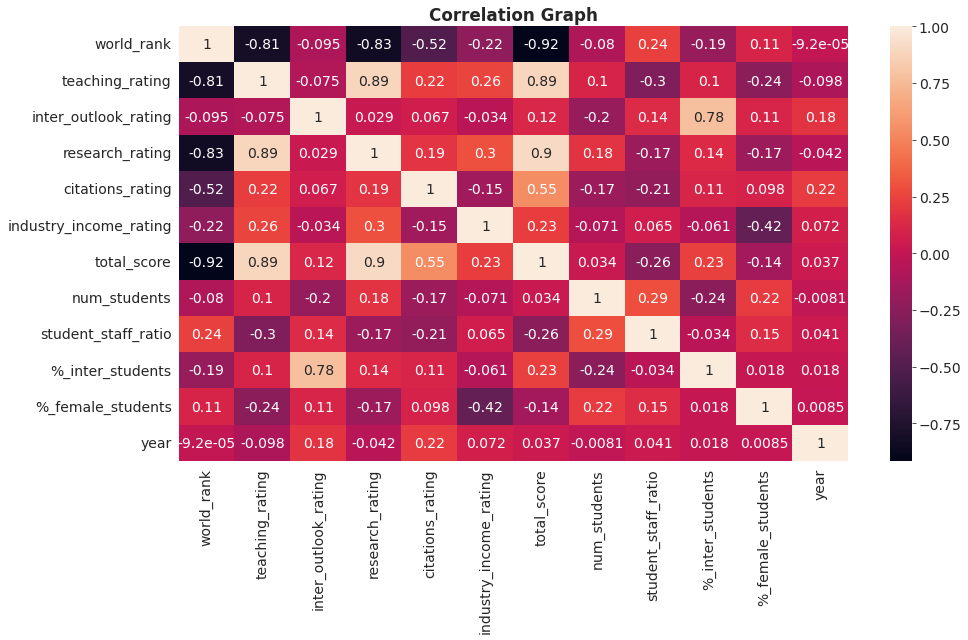

In [111]:
#matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

plt.figure(figsize=(15,8))
sns.heatmap(uni.corr(), annot=True)
plt.title("Correlation Graph", fontweight="bold")

## ***IV.4.Create Pie Chart show percent each value in Total Score***

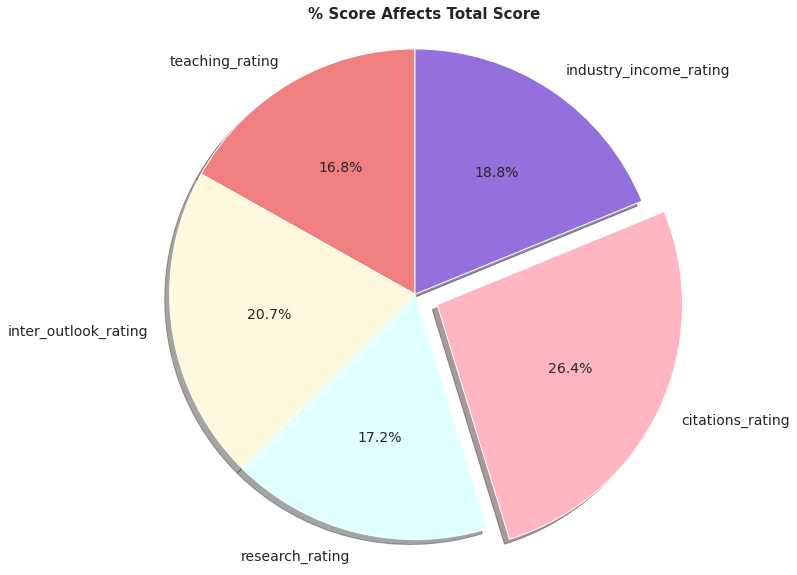

In [112]:
labels = 'teaching_rating','inter_outlook_rating','research_rating','citations_rating','industry_income_rating'
mean_score_in_total_score = [83.4, 102.5, 85.2, 130.9, 93.1]
explode = (0, 0, 0, 0.1, 0)
cols = ['lightcoral', 'cornsilk', 'lightcyan', 'lightpink', 'mediumpurple']

fig1, ax1 = plt.subplots()
ax1.pie(mean_score_in_total_score, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, colors = cols)
ax1.axis('equal')
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('% Score Affects Total Score', fontdict={'fontsize':15},  weight= 'bold')
plt.show()

## ***IV.5.Overall Score University World in each year***

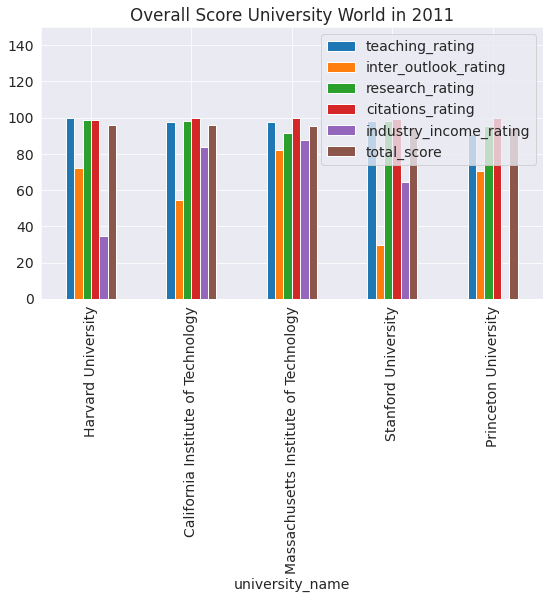

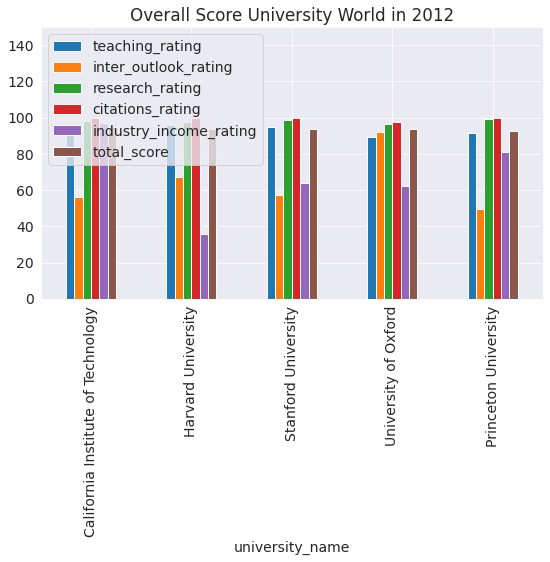

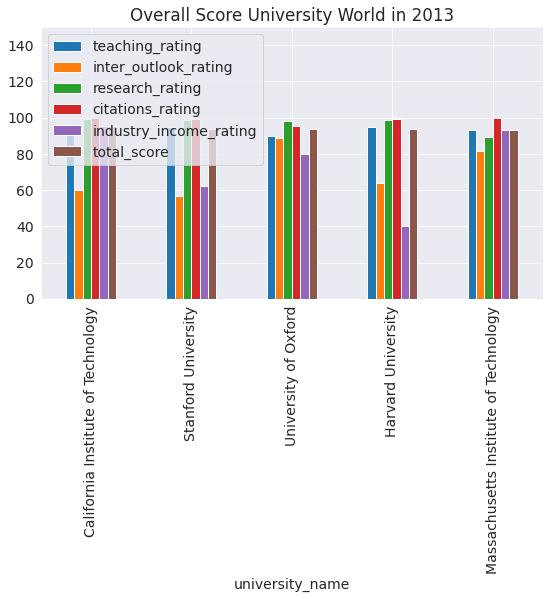

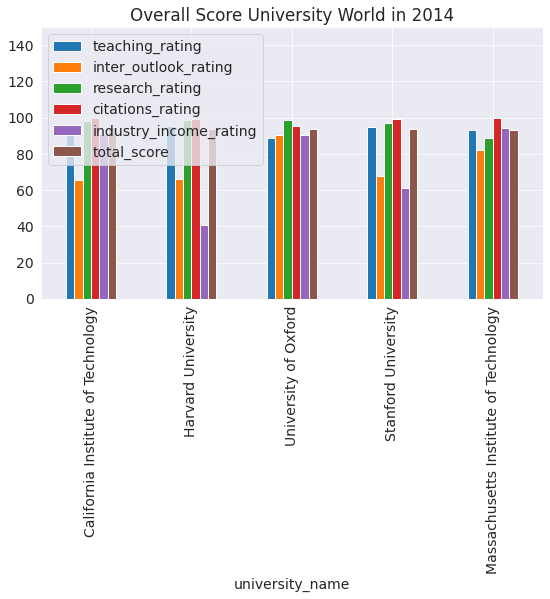

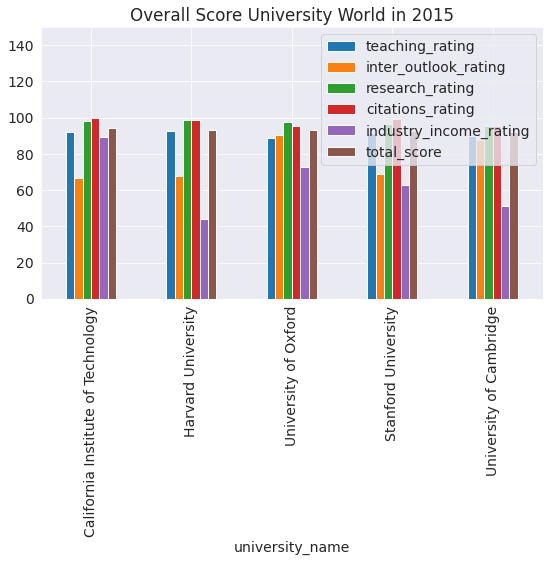

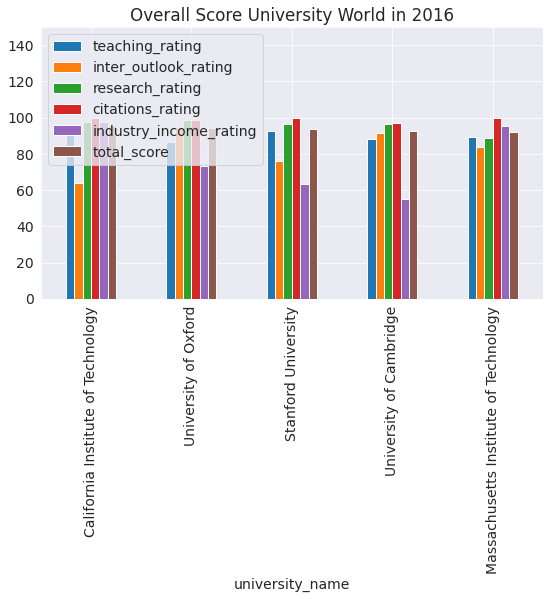

In [113]:
years = [2011, 2012, 2013, 2014, 2015, 2016]
for year in years:
  top_5_world_rank = uni.loc[uni['world_rank']<=5]
  top_5_world_rank = top_5_world_rank.loc[top_5_world_rank['year']==year]
  top_5_world_rank = top_5_world_rank.drop(['country' ,'world_rank','num_students','%_inter_students','%_female_students','student_staff_ratio'], axis = 1)
  top_5_world_rank_grouped = top_5_world_rank.groupby('year')[total_score]
  top_5_world_rank_grouped.plot(x= 'university_name', kind='bar', title ='Overall Score University World in {}'.format(year) , ylim=(0,150))

## ***IV.6.Top 5 Universities's rank chart***

Describe top 5 work rank data

In [114]:
top_5_world_rank.describe()

,teaching_rating,inter_outlook_rating,research_rating,citations_rating,industry_income_rating,total_score,year
count,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.0
mean,90.440000,82.04000,95.600000,99.040000,76.920000,93.620000,2016.0
std,3.622568,12.29321,4.045368,1.221884,19.092328,1.245793,0.0
min,86.500000,64.00000,88.600000,97.000000,55.000000,92.000000,2016.0
25%,88.200000,76.30000,96.200000,98.800000,63.300000,92.800000,2016.0
50%,89.400000,84.00000,96.700000,99.700000,73.100000,93.900000,2016.0
75%,92.500000,91.50000,97.600000,99.800000,95.400000,94.200000,2016.0
max,95.600000,94.40000,98.900000,99.900000,97.800000,95.200000,2016.0


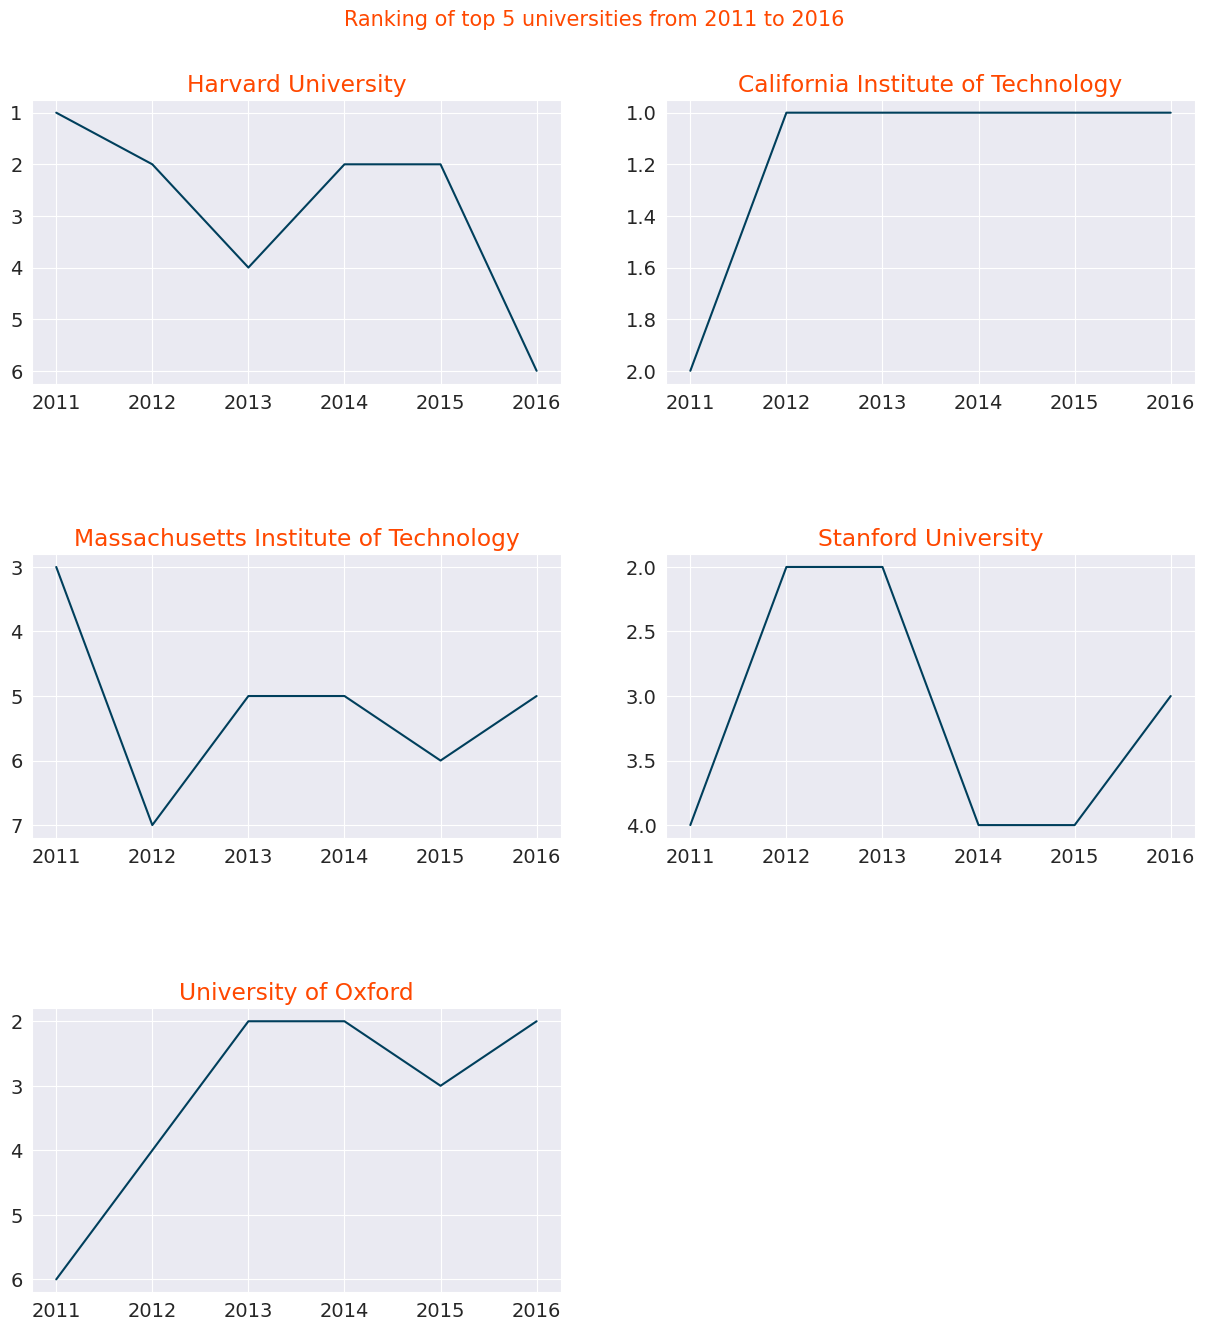

In [115]:
top_uni = ['Harvard University', 'California Institute of Technology', 'Massachusetts Institute of Technology', 'Stanford University', 'University of Oxford']

topunis_df = uni[uni['university_name'].isin(top_uni)][['year','university_name','world_rank']].reset_index(drop=True)

fig = plt.figure(figsize=(15,15), dpi=100)

for uni_name, i in zip(top_uni, range(1, 7)):
    new_df = topunis_df[topunis_df['university_name'] == uni_name]
    ax = fig.add_subplot(3, 2, i)
    ax.plot(new_df['year'], new_df['world_rank'], color='#003f5c', linewidth=1.5)
    plt.gca().invert_yaxis()
    ax.set_title(uni_name, color='#ff4800')
    
fig.subplots_adjust(wspace=0.2, hspace=0.6, top=0.92)
fig.suptitle('Ranking of top 5 universities from 2011 to 2016', fontsize=15, color = '#ff4800');

## ***IV.7.By country***

### Define country using Sub Data

In [116]:
def map_region(name):
    for i, country in enumerate(region_dict['country']):
        if name == country:
            return region_dict.loc[i, 'region']
        else:
            pass

uni['region'] = uni['country'].apply(map_region)

In [117]:
regions = uni[['region','university_name']]
regions_count = regions.drop_duplicates()['region'].value_counts()
print(regions_count)

Northern America     98
Western Europe       69
Central Europe       31
Western Asian        27
Northern Europe      13
Australia             9
Eastern Asian         9
Southeastern Asia     2
South Africa          1
South America         1
Eastern Europe        1
Name: region, dtype: int64


### There are 32 countries and a total of 261 schools in the top 200 from 2011 to 2016

In [118]:
#Có 32 quốc gia và tổng cộng 261 trường lọt vào top 200 từ năm 2011 đến 2016
country_grouped = uni.groupby('country').agg({'university_name': 'nunique'}).sort_values(by='university_name',ascending=0)
print(country_grouped)


                          university_name
country                                  
United States of America               86
United Kingdom                         35
Germany                                22
Netherlands                            12
Canada                                 12
France                                  8
Australia                               8
China                                   7
Sweden                                  7
Switzerland                             7
Hong Kong                               6
South Korea                             5
Japan                                   5
Belgium                                 5
Turkey                                  5
Taiwan                                  4
Denmark                                 3
Israel                                  3
Italy                                   3
Spain                                   3
Singapore                               2
Republic of Ireland               

In [119]:
total_score_countries = {}
countries = uni['country'].unique() 
for r in countries:
    country_group = uni[uni['country'] == r] 
    country_mean = country_group['total_score'].mean()
    total_score_countries[r] = country_mean
total_score_countries

{'United States of America': 64.50800915331808,
 'United Kingdom': 58.994086021505375,
 'Switzerland': 61.02439024390245,
 'Canada': 60.98125000000001,
 'Hong Kong': 60.21363636363637,
 'Japan': 59.47407407407406,
 'South Korea': 58.821739130434786,
 'Singapore': 65.60000000000001,
 'Australia': 60.120000000000005,
 'China': 61.33888888888888,
 'France': 55.00555555555556,
 'Sweden': 56.584375,
 'Germany': 54.73417721518989,
 'Republic of Ireland': 51.79090909090908,
 'Finland': 56.03333333333333,
 'Taiwan': 50.97777777777779,
 'South Africa': 54.05000000000001,
 'Turkey': 50.01428571428571,
 'Netherlands': 55.356521739130436,
 'Belgium': 54.21363636363635,
 'Denmark': 51.555555555555564,
 'Norway': 48.04285714285715,
 'Spain': 49.6125,
 'New Zealand': 48.633333333333326,
 'Egypt': 51.6,
 'Austria': 48.47142857142857,
 'Israel': 48.077777777777776,
 'Brazil': 47.3,
 'Italy': 54.574999999999996,
 'Russian Federation': 48.95,
 'Luxembourg': 49.4}

## ***IV.8.By region***

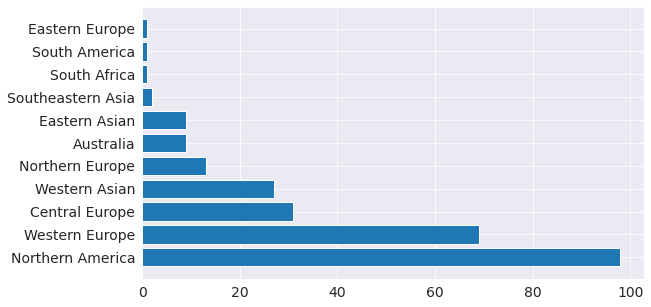

In [120]:
plt.barh(regions_count.index, regions_count)
plt.show()

In [121]:
mean_total_score_regions = uni.groupby('region').agg({'total_score': 'mean'})
print(mean_total_score_regions)

                   total_score
region                        
Australia            58.768627
Central Europe       56.419685
Eastern Asian        49.082353
Eastern Europe       48.950000
Northern America     64.158969
Northern Europe      54.146032
South Africa         54.050000
South America        47.300000
Southeastern Asia    65.600000
Western Asian        59.053535
Western Europe       56.972404


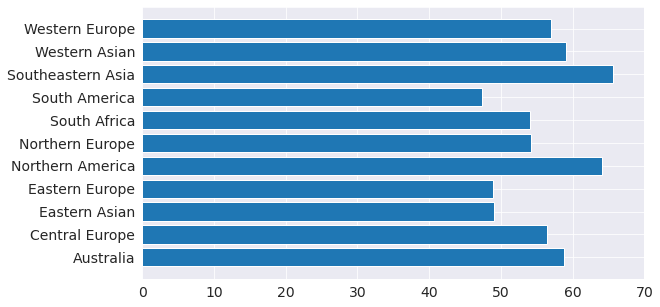

In [122]:
plt.barh(mean_total_score_regions.index, mean_total_score_regions['total_score'])
plt.xlim(0,70)
plt.show()

## ***IV.9.Female and Male student***

In [123]:
PFS_grouped = uni.groupby('year')
per_female_grouped = PFS_grouped['%_female_students'].agg(np.mean)
per_male_grouped = 100 - per_female_grouped
per_male_grouped = per_male_grouped.rename(index='%_male_students')
print(per_female_grouped)
print(per_male_grouped)

year
2011    49.426966
2012    49.849162
2013    49.329609
2014    49.234637
2015    49.142857
2016    50.209945
Name: %_female_students, dtype: float64
year
2011    50.573034
2012    50.150838
2013    50.670391
2014    50.765363
2015    50.857143
2016    49.790055
Name: %_male_students, dtype: float64


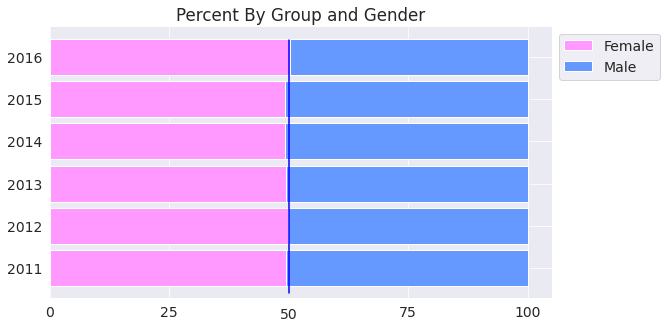

In [124]:
# create 100% stacked bar
# prepair data in percentage
df= pd.concat([per_female_grouped, per_male_grouped], axis= 1)
r = [0, 1, 2, 3, 4, 5]
female_bar = list(df['%_female_students'])
male_bar = list(df['%_male_students'])
# plot info
barHeight = 0.85
names = tuple(df.index)
fig, ax = plt.subplots()
# create Female Bars
ax.barh(r, female_bar, color='#ff99ff', edgecolor='white', height=barHeight, label="Female")
# create Male Bars
ax.barh(r, male_bar, left=female_bar, color='#6699ff', edgecolor='white', height=barHeight, label="Male")

# custom x axis
plt.yticks(r, names) # set the name of each Bar
ax.set_xticks([0,25,75,100]) # overwrite the xticks at the bottom
plt.tick_params(bottom=0, left=0) # disable the tick from bottom and left side

for pos in ['top', 'left', 'right', 'bottom']:
    ax.spines[pos].set_visible(0)
 
# add a legend
ax.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)
 
# add a line
ax.axvline(x=50, ls='-', color = 'b', ymin=0.02, ymax=0.95)
ax.text(x=50, y=-1.2, s='50', ha='center')
ax.set_title(label='Percent By Group and Gender')

# show graph
plt.show()